In [112]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
credentials_path = '/Users/valeria/gcp_credentials/loans-experiment-200203204835.json'
if credentials_path not in sys.path:
    sys.path.append(credentials_path)

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
from src.config.data_constants import COLUMNS
from src.config.paths_constants import RAW_DATA_PATH
from src.data.load_bigquery import load_ee_data_from_db
from src.features.pre_processing import replace_values

In [4]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/valeria/gcp_credentials/loans-experiment-200203204835.json"

In [5]:
raw_df = load_ee_data_from_db()

In [6]:
df = replace_values(raw_df)

In [7]:
df.head()

,LoanNumber,NewCreditCustomer,LoanApplicationStartedDate,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,...,DebtToIncome,FreeCash,Status,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,864,True,2009-07-28 13:14:56+00:00,14,3,Cross-Ref by Phone,Estonian,31.0,1978-05-21,Woman,...,0.0,0.0,Repaid,,NaN,0,0.0000,0.0000,0.0,0
1,1029,True,2009-08-27 12:23:13+00:00,12,5,Cross-Ref by Phone,Estonian,23.0,1986-07-22,Male,...,0.0,0.0,Repaid,,NaN,2,191.7347,0.0000,0.0,0
2,1185,True,2009-09-28 12:03:43+00:00,12,2,Cross-Ref by Phone,Estonian,26.0,1983-03-11,Male,...,0.0,0.0,Repaid,,NaN,4,357.9090,38.1259,0.0,0
3,962,True,2009-08-17 11:02:31+00:00,11,2,Cross-Ref by Phone,Estonian,38.0,1971-03-14,Male,...,0.0,0.0,Repaid,,NaN,1,319.5583,0.0000,0.0,0
4,356,True,2009-04-07 21:22:23+00:00,21,3,Cross-Ref by Phone,Estonian,31.0,1977-06-05,Woman,...,0.0,0.0,Repaid,,NaN,0,0.0000,0.0000,0.0,0


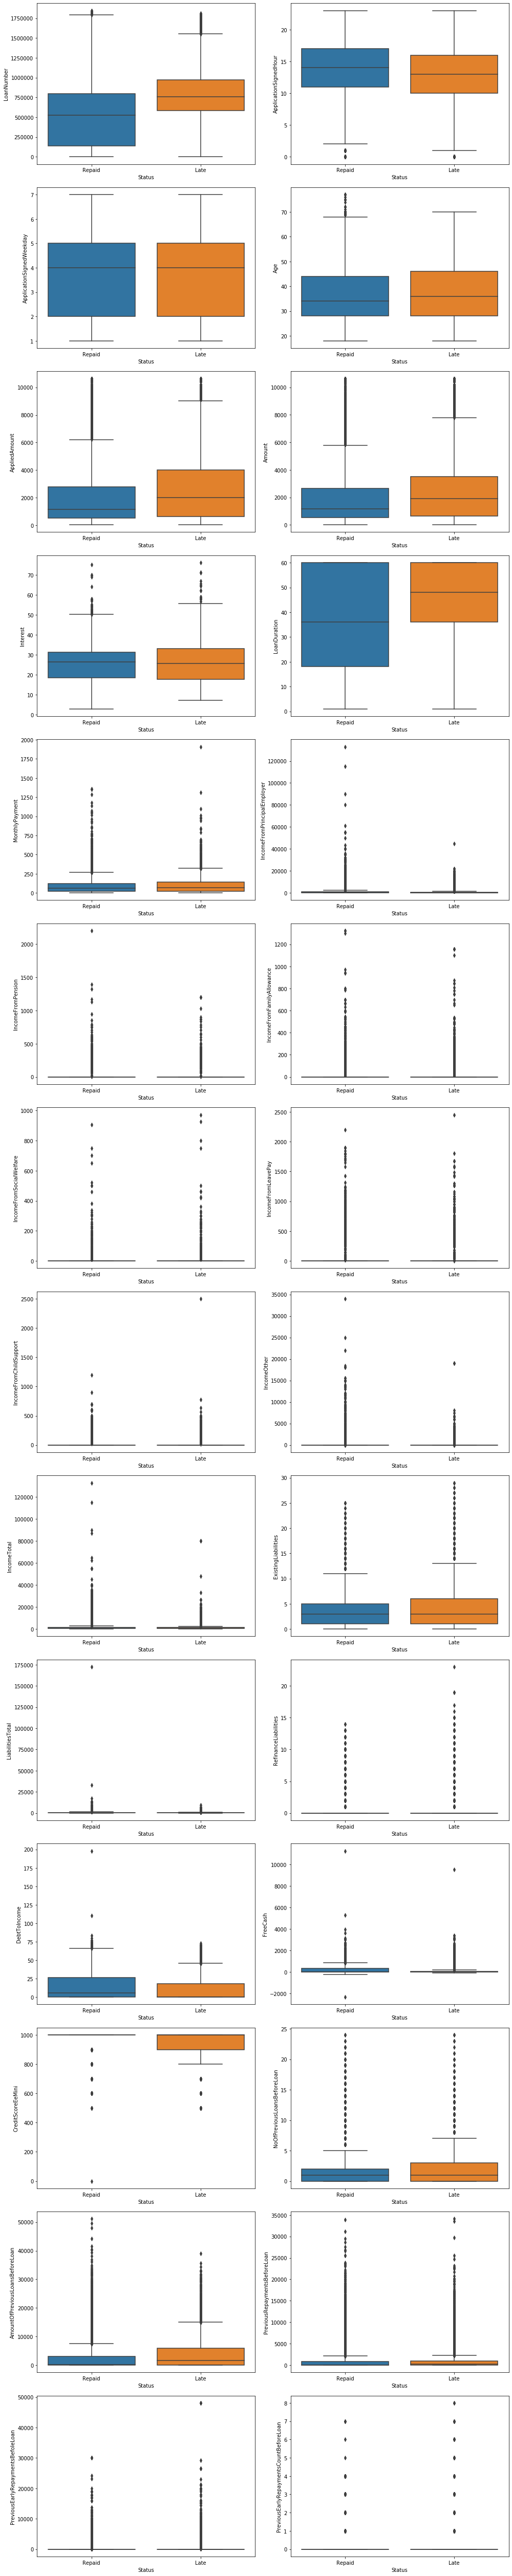

In [8]:
numerical_columns = df.select_dtypes(np.number).columns
nrows = math.ceil(len(numerical_columns)/2)

fig, ax = plt.subplots(nrows, 2, figsize=(14, nrows*5))
row_pos=0
col_pos=0
for col in numerical_columns:
    sns.boxplot(x=df['Status'] ,y=df[col], ax=ax[row_pos][col_pos])
    row_pos = row_pos+1 if col_pos ==1 else row_pos
    col_pos = col_pos+1 if col_pos!=1 else 0
plt.tight_layout()
plt.show() 

In [108]:
df[COLUMNS.AGE].median()

[autoreload of src.config.data_constants failed: Traceback (most recent call last):
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_w

35.0

In [107]:
print("Missing data".upper())
df = df.replace('', np.nan)
df = df.replace([None], np.nan)
for col in df.columns:
    perc_missing=round(df[col].isnull().sum()/len(df)*100, 10)
    print('{}: {}%'.format(col, perc_missing))

[autoreload of src.config.data_constants failed: Traceback (most recent call last):
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/valeria/Google Drive/Valeria - Personal/projects/responsible_lending/responsible-lending/src/config/data_constants

MISSING DATA
LoanNumber: 0.0%
NewCreditCustomer: 0.0%
LoanApplicationStartedDate: 0.0%
ApplicationSignedHour: 0.0%
ApplicationSignedWeekday: 0.0%
VerificationType: 0.1326824384%
LanguageCode: 0.0%
Age: 0.1326824384%
DateOfBirth: 0.0%
Gender: 0.1376893228%
AppliedAmount: 0.0%
Amount: 0.0%
Interest: 0.0%
LoanDuration: 0.0%
MonthlyPayment: 14.8103642508%
County: 3.8728251346%
City: 1.4369758418%
UseOfLoan: 51.2154212042%
Education: 0.1351858806%
MaritalStatus: 51.3481036425%
NrOfDependants: 52.2393290775%
EmploymentStatus: 51.7786957066%
EmploymentDurationCurrentEmployer: 1.8425334835%
WorkExperience: 51.3556139692%
OccupationArea: 51.4657654275%
HomeOwnershipType: 4.1381900113%
IncomeFromPrincipalEmployer: 0.0%
IncomeFromPension: 0.0%
IncomeFromFamilyAllowance: 0.0%
IncomeFromSocialWelfare: 0.0%
IncomeFromLeavePay: 0.0%
IncomeFromChildSupport: 0.0%
IncomeOther: 0.0%
IncomeTotal: 0.0%
ExistingLiabilities: 0.0%
LiabilitiesTotal: 0.0%
RefinanceLiabilities: 0.0%
DebtToIncome: 0.1126549005%
F

In [110]:
df['CreditScoreEeMini'].unique()

array([  nan,  900.,  700., 1000.,  600.,  800.,  500.,    0.])

In [104]:
#if AmountOfPreviousLoansBeforeLoan==0 => PreviousRepaymentsBeforeLoan should be 0
# don't know what to do here yet after prev step
len(df[((df['NoOfPreviousLoansBeforeLoan']==0) | (df['AmountOfPreviousLoansBeforeLoan']==0)) & (df['PreviousRepaymentsBeforeLoan'].isnull())])/len(df)




0.11102766303667543

In [89]:

# If PreviousEarlyRepaymentsBefoleLoan == 0 => PreviousEarlyRepaymentsCountBeforeLoan=0
#If PreviousEarlyRepaymentsCountBeforeLoan == 0 => PreviousEarlyRepaymentsBefoleLoan=0
df[(df['PreviousEarlyRepaymentsBefoleLoan']!=0.0)&(df['PreviousEarlyRepaymentsCountBeforeLoan']==0.0)]

,LoanNumber,NewCreditCustomer,LoanApplicationStartedDate,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,...,DebtToIncome,FreeCash,Status,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
13778,828478,False,2018-05-28 10:09:38+00:00,10,2,Income Unverified,Estonian,31.0,1987-02-17,Male,...,0.0,0.0,Repaid,M,600.0,4,7645.0,NaN,NaN,0
13779,828940,True,2018-05-29 10:18:19+00:00,10,3,Income Unverified,Estonian,50.0,1968-04-14,Woman,...,0.0,0.0,Repaid,M,1000.0,0,0.0,NaN,NaN,0
13782,836638,True,2018-06-13 00:23:01+00:00,0,4,Income Unverified,Estonian,38.0,1980-01-14,Male,...,0.0,0.0,Repaid,M,800.0,0,0.0,NaN,NaN,0
13784,824533,True,2018-05-18 08:25:48+00:00,15,6,Income Unverified,Estonian,35.0,1983-05-12,Male,...,0.0,0.0,Repaid,M,1000.0,0,0.0,NaN,NaN,0
13785,846958,False,2018-06-29 07:10:54+00:00,7,6,Income Unverified,Estonian,30.0,1987-09-28,Male,...,0.0,0.0,Repaid,M,1000.0,3,11160.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33940,906369,False,2018-09-29 14:36:53+00:00,14,7,Income Unverified,Russian,29.0,1989-06-25,Male,...,0.0,0.0,Late,M,1000.0,2,4250.0,92.22,NaN,0
33942,884905,False,2018-08-27 17:56:13+00:00,17,2,Income Unverified,Estonian,32.0,1986-02-14,Male,...,0.0,0.0,Late,M,1000.0,7,13025.0,46.06,NaN,0
33943,901219,False,2018-09-21 17:02:33+00:00,17,6,Income and Expenes Verified,Russian,46.0,1972-01-27,Male,...,0.0,0.0,Late,M,1000.0,1,3670.0,NaN,NaN,0
33944,890402,True,2018-09-05 09:22:38+00:00,9,4,Income Unverified,Russian,48.0,1970-05-29,Male,...,0.0,0.0,Late,M,800.0,0,0.0,NaN,NaN,0


In [106]:
df[COLUMNS.GENDER]

[autoreload of src.config.data_constants failed: Traceback (most recent call last):
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/valeria/anaconda/envs/cm/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/valeria/Google Drive/Valeria - Personal/projects/responsible_lending/responsible-lending/src/config/data_constants

0        Woman
1         Male
2         Male
3         Male
4        Woman
         ...  
39940     Male
39941     Male
39942     Male
39943    Woman
39944     Male
Name: Gender, Length: 39945, dtype: object

In [9]:
# REMOVE FOLLOWING OUTLIERS

In [10]:
df[df[COLUMNS.LIABILITIES_TOTAL]>50000]

,LoanNumber,NewCreditCustomer,LoanApplicationStartedDate,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,...,DebtToIncome,FreeCash,Status,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
2383,4591,False,2010-10-02 09:48:01+00:00,10,7,Income Verified,Estonian,38.0,1972-03-24,Male,...,0.0,0.0,Repaid,,NaN,4,888.537,423.0706,0.0,0


In [11]:
df[df[COLUMNS.DEBT_TO_INCOME]>100]

,LoanNumber,NewCreditCustomer,LoanApplicationStartedDate,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,...,DebtToIncome,FreeCash,Status,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
573,6586,True,2011-05-08 14:45:30+00:00,15,1,Income and Expenes Verified,Estonian,49.0,1961-06-04,Woman,...,110.44,-55.0,Repaid,,NaN,0,0.0000,0.0000,0.0,0
979,7076,False,2011-07-04 06:30:59+00:00,11,3,Income and Expenes Verified,Estonian,58.0,1953-07-04,Male,...,198.02,-2332.0,Repaid,,NaN,1,319.5586,338.2501,0.0,0


In [12]:
df[df[COLUMNS.FREE_CASH]>=6000]

,LoanNumber,NewCreditCustomer,LoanApplicationStartedDate,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,...,DebtToIncome,FreeCash,Status,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
6231,475023,True,2016-03-04 17:23:48+00:00,23,2,Income and Expenes Verified,Estonian,22.0,1994-02-16,Male,...,1.19,11284.44,Repaid,,1000.0,0,0.0,0.00,0.0,0
12741,611639,False,2017-02-09 15:45:26+00:00,15,5,Income Verified,Estonian,26.0,1990-02-18,Woman,...,3.31,9526.86,Late,,800.0,2,3580.0,1530.14,0.0,0


In [13]:
df[df[COLUMNS.CREDIT_SCORE_EE_MINI]<500]

,LoanNumber,NewCreditCustomer,LoanApplicationStartedDate,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,...,DebtToIncome,FreeCash,Status,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
37948,139536,True,2014-05-03 11:36:21+00:00,18,3,Income and Expenes Verified,Estonian,28.0,1985-12-06,Male,...,6.12,862.0,Repaid,,0.0,0,0.0,0.0,0.0,0


In [14]:
# Investigate OUTLIER:
COLUMNS.INCOME_FROM_PRINCIPAL_EMPLOYER, COLUMNS.INCOME_FROM_CHILD_SUPPORT, COLUMNS.INCOME_OTHER #FOR REPAID
COLUMNS.LIABILITIES_TOTAL
\COLUMNS.FREE_CASH
COLUMNS.CREDIT_SCORE_EE_MINI #THERE S ONE THAT 0 AND MOST ARE 1000 (WHY?)
# NEED TO TRANSFORM % FROM INCOME - CHECK THAT INCOME TOTAL == SUM OF OTHER INCOME

SyntaxError: unexpected character after line continuation character (<ipython-input-14-eaaca5340bcf>, line 4)

In [ ]:
#Are these super high interests correct?
df['Interest'].sort_values().unique()

In [ ]:
(df['AppliedAmount'] < df['Amount']).sum()/len(df)

In [ ]:
(df[COLUMNS.INCOME_TOTAL] < df[
    ['IncomeFromPrincipalEmployer',
 'IncomeFromPension',
 'IncomeFromFamilyAllowance',
 'IncomeFromSocialWelfare',
 'IncomeFromLeavePay',
 'IncomeFromChildSupport',
 'IncomeOther']].sum(axis=1)).sum()

In [15]:
len(df)

39945

In [ ]:
# Look at null values and category count

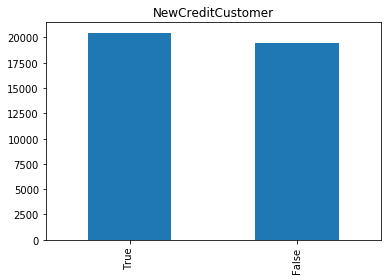

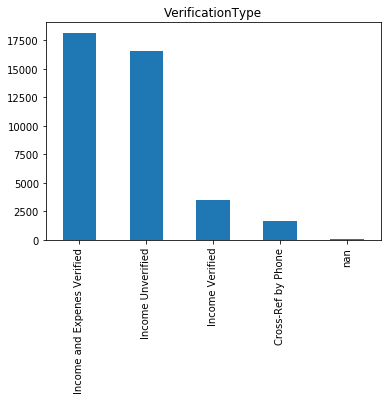

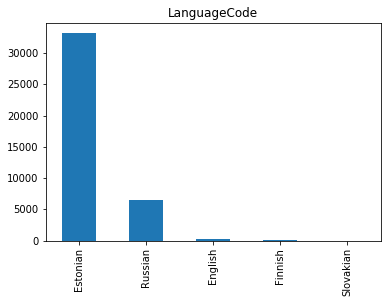

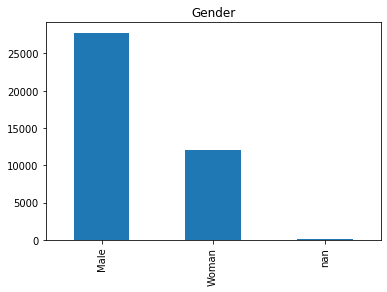

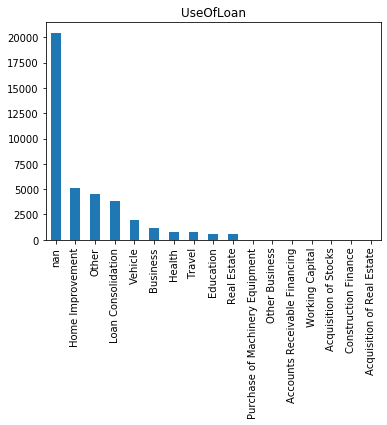

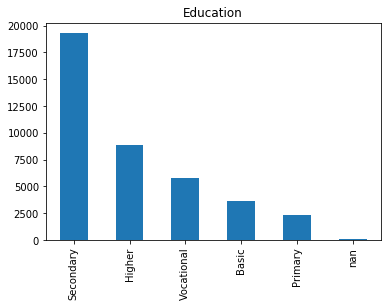

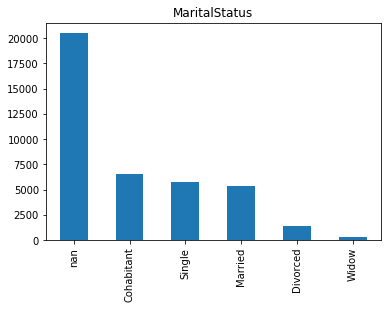

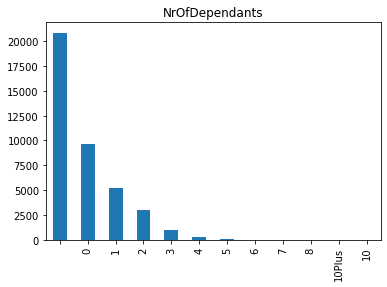

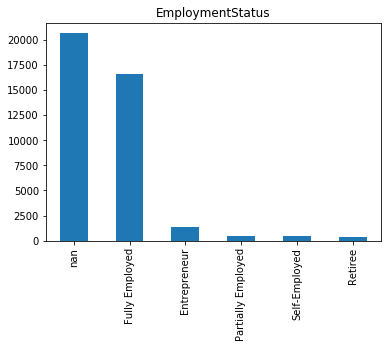

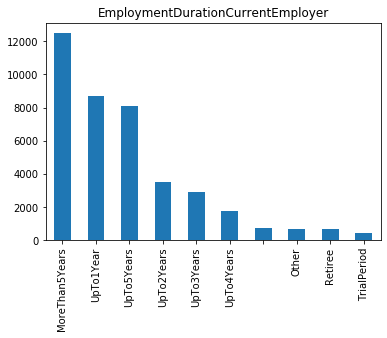

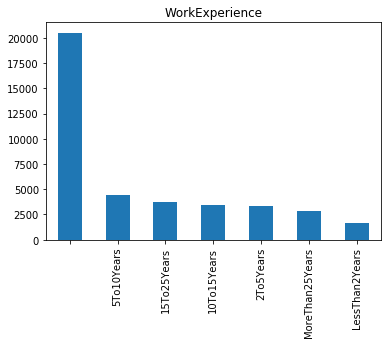

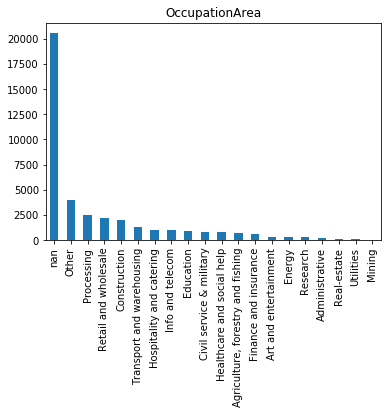

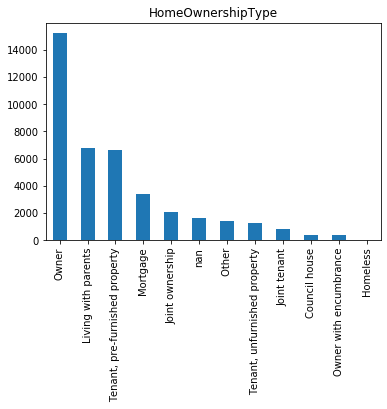

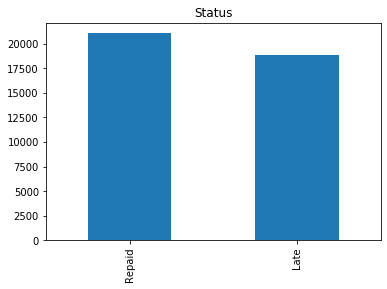

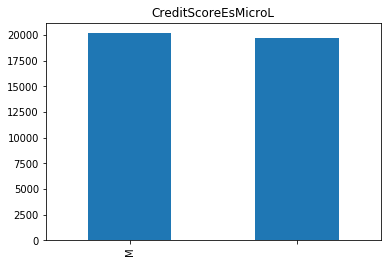

In [12]:
df[COLUMNS.DATE_OF_BIRTH] = pd.to_datetime(df[COLUMNS.DATE_OF_BIRTH])
for col in ['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'UseOfLoan', 'Education', 'MaritalStatus',
       'NrOfDependants', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'Status', 'CreditScoreEsMicroL']:
    # Calculates the histogram for feature1
    counts = df[col].value_counts(dropna=False)

    counts.plot.bar(title=col)
    plt.show()

- **Verification type**: drop nan (they're so few)
- **Language**: Make stonian, russian and other
- **Gender**: drop nan gender
- view tables for **UseOfLoan** and **Occupatiioin area** (drop?)
- **edu**: drop nan
- **Marital_status**: convert 'nan' to str
- **NrDep**: make it 0, 1, 2+ and nan as stra
- **EmploymentStatus** make it fully emp, nan as str, entr and other
check which have 70% nulls based on columns types and create low, med, high to analyse fairnessa
- **EmployDuratCurrEmp**" Bin Retiree and '' into other (keep the rest)
- **workexp** convert into str
- **HomeOwnership**: bin council house, homeless into other and 'owner with' with owner
- **CREDITSCOREESMICROL** make it binary (is M)

In [111]:
df[COLUMNS.HOME_OWNERSHIP_TYPE].unique()

array([nan, 'Homeless', 'Living with parents',
       'Tenant, unfurnished property', 'Owner', 'Joint ownership',
       'Owner with encumbrance', 'Mortgage',
       'Tenant, pre-furnished property', 'Joint tenant', 'Council house',
       ' Other'], dtype=object)

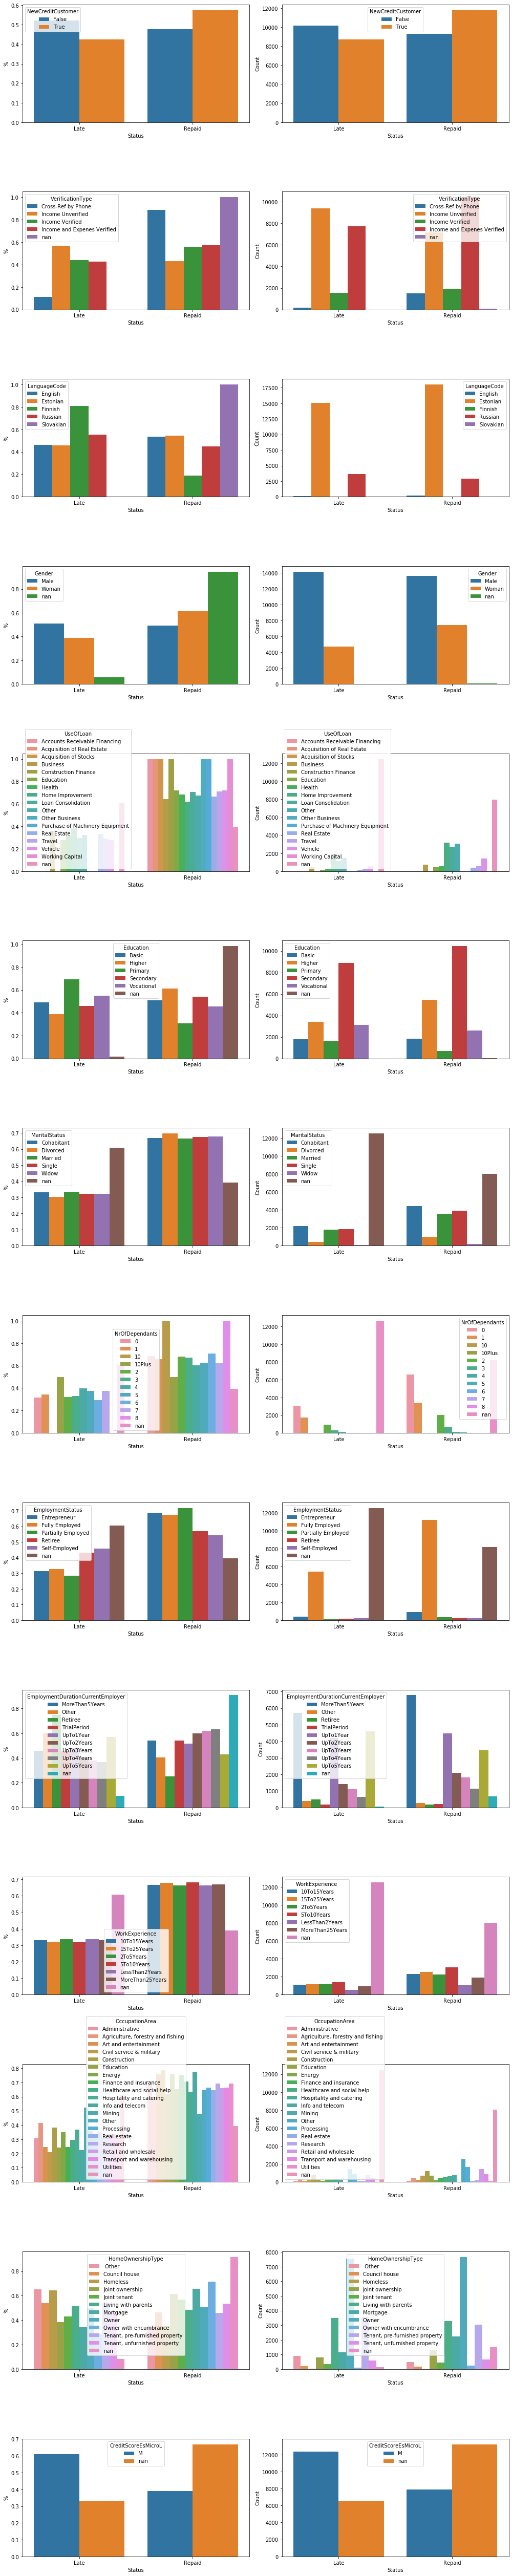

In [71]:
obj_cols = ['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'UseOfLoan', 'Education', 'MaritalStatus',
       'NrOfDependants', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'CreditScoreEsMicroL']
fig, ax = plt.subplots(len(obj_cols), 2, figsize=(14, len(obj_cols)*5))
row_pos=0
for col in obj_cols:
    abs_df = pd.crosstab(index=df[COLUMNS.STATUS], columns=df[col].fillna('nan'), normalize='columns').unstack().reset_index().rename(columns={0:'%'})
    perc_df= pd.crosstab(index=df[COLUMNS.STATUS], columns=df[col].fillna('nan')).unstack().reset_index().rename(columns={0:'Count'})
    sns.barplot(data=abs_df, x=COLUMNS.STATUS, y='%', ax=ax[row_pos][0], hue=col)
    sns.barplot(data=perc_df, x=COLUMNS.STATUS, y='Count', ax=ax[row_pos][1], hue=col)
    row_pos = row_pos+1
plt.tight_layout()
plt.show() 


In [66]:
df[COLUMNS.CREDIT_SCORE_EE_MINI].unique()

array([  nan,  900.,  700., 1000.,  600.,  800.,  500.,    0.])

In [18]:
pd.crosstab(index=df[COLUMNS.STATUS], columns=df[COLUMNS.LANGUAGE_CODE], dropna=False).melt()

LanguageCode,English,Estonian,Finnish,Russian,Slovakian
Status,,,,,
Late,132,15106,17,3604,0
Repaid,153,18020,4,2907,2


In [11]:
df.select_dtypes(include=[np.object, np.bool]).columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus',
       'NrOfDependants', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'Status', 'CreditScoreEsMicroL'],
      dtype='object')

In [ ]:
#too many counties and too many cities ... check which are more distinctive
# too many missng values n use of loan - check if any is relevant, same for marital_status, employment_status, 
#WORK EXPERENCE, OCCUPATON AREA

In [18]:
df.dtypes

LoanNumber                                              int64
NewCreditCustomer                                        bool
LoanApplicationStartedDate                datetime64[ns, UTC]
ApplicationSignedHour                                   int64
ApplicationSignedWeekday                                int64
VerificationType                                       object
LanguageCode                                           object
Age                                                   float64
DateOfBirth                                            object
Gender                                                 object
AppliedAmount                                         float64
Amount                                                float64
Interest                                              float64
LoanDuration                                            int64
MonthlyPayment                                        float64
County                                                 object
City    